<a href="https://colab.research.google.com/github/CaioPereira51/analitics-com-python/blob/main/CaioPereira_lista09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='blue'>FUMEC - Analytics com Python</font>
## **Lista de exercícios 09 - Preparação de dados**

<br>**ATENÇÃO:** para salvar o arquivo .ipynb do notebook, faça da seguinte forma:

* **Google Colaboratory**: opção do menu "Arquivo --> Fazer download --> Fazer download do .ipynb"

* Salve o arquivo com o nome "**SeuNome_lista09.ipynb**"

<br>



### **Importar o arquivo de dados**:

Importar o arquivo de dados "**dados_portuarios.csv**" para o Google Colab.



In [1]:
import pandas as pd
import numpy as np  #biblioteca necessária para trabalhar com os vetores e matrizes
import matplotlib.pyplot as plt #biblioteca utilizada para construir os gráficos
import seaborn as sns

### **01) Carregar e preparar o dataset para a regressão**:

Explorar o dataset "**dados_portuarios.csv**" utilizando os recursos da biblioteca Pandas.



In [2]:
data = pd.read_csv('https://drive.google.com/uc?export=download&id=1zJhnnDm1qd8qeCPCSN-rpWlwlqS0Zc7I')
data.head()

,valid_import,item,importer_id,exporter_id,country_of_origin,declared_quantity,declared_cost,mode_of_transport,route,date_of_departure,date_of_arrival,declared_weight,actual_weight,days_in_transit
0,True,cigar,111,222,India,129,3784.402551,sea,asia,04/25/2019,05/13/2019,1608.605135,1637.661221,18.232857
1,True,cigar,111,222,India,104,3081.350806,sea,america,04/22/2019,05/24/2019,831.719301,848.273419,32.436029
2,True,cigar,111,222,India,130,4414.125741,sea,europe,04/29/2019,05/16/2019,1527.704165,1582.063911,16.996206
3,True,cigar,111,222,India,143,2533.535991,sea,panama,05/05/2019,05/25/2019,1138.680563,1179.993817,19.965886
4,True,cigar,111,222,China,141,4396.397887,sea,asia,05/14/2019,06/05/2019,761.744581,781.735080,22.160034


Selecionar apenas as colunas **declared_quantity**, **declared_cost**, **declared_weight**, **actual_weight** e **days_in_transit** do dataset

In [3]:
selected_columns = ['declared_quantity', 'declared_cost', 'declared_weight', 'actual_weight', 'days_in_transit']
subset_data = data[selected_columns]

print(subset_data.head())

   declared_quantity  declared_cost  declared_weight  actual_weight  \
0                129    3784.402551      1608.605135    1637.661221   
1                104    3081.350806       831.719301     848.273419   
2                130    4414.125741      1527.704165    1582.063911   
3                143    2533.535991      1138.680563    1179.993817   
4                141    4396.397887       761.744581     781.735080   

   days_in_transit  
0        18.232857  
1        32.436029  
2        16.996206  
3        19.965886  
4        22.160034  


Listar o total de valores nulos (ausentes) em cada coluna

In [4]:
missing_values = data.isnull().sum()

print(missing_values)

valid_import         0
item                 0
importer_id          0
exporter_id          0
country_of_origin    0
declared_quantity    0
declared_cost        0
mode_of_transport    0
route                0
date_of_departure    0
date_of_arrival      0
declared_weight      0
actual_weight        2
days_in_transit      0
dtype: int64


Preencher os valores nulos com a média dos valores


In [5]:
column_means = data.mean()

data_filled = data.fillna(column_means)

print(data_filled.head())

   valid_import   item  importer_id  exporter_id country_of_origin  \
0          True  cigar          111          222             India   
1          True  cigar          111          222             India   
2          True  cigar          111          222             India   
3          True  cigar          111          222             India   
4          True  cigar          111          222             China   

   declared_quantity  declared_cost mode_of_transport    route  \
0                129    3784.402551               sea     asia   
1                104    3081.350806               sea  america   
2                130    4414.125741               sea   europe   
3                143    2533.535991               sea   panama   
4                141    4396.397887               sea     asia   

  date_of_departure date_of_arrival  declared_weight  actual_weight  \
0        04/25/2019      05/13/2019      1608.605135    1637.661221   
1        04/22/2019      05/24/2019     

<ipython-input-5-cf402293c226>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  column_means = data.mean()


Listar novamente o total de valores nulos de cada coluna

In [6]:
missing_values = data.isnull().sum()

print(missing_values)

valid_import         0
item                 0
importer_id          0
exporter_id          0
country_of_origin    0
declared_quantity    0
declared_cost        0
mode_of_transport    0
route                0
date_of_departure    0
date_of_arrival      0
declared_weight      0
actual_weight        2
days_in_transit      0
dtype: int64


### **02) Realizar a análise exploratória e preparação de dados**:

Verificar se existem **ouliers**, usando o **bloxplot**, para todas as colunas

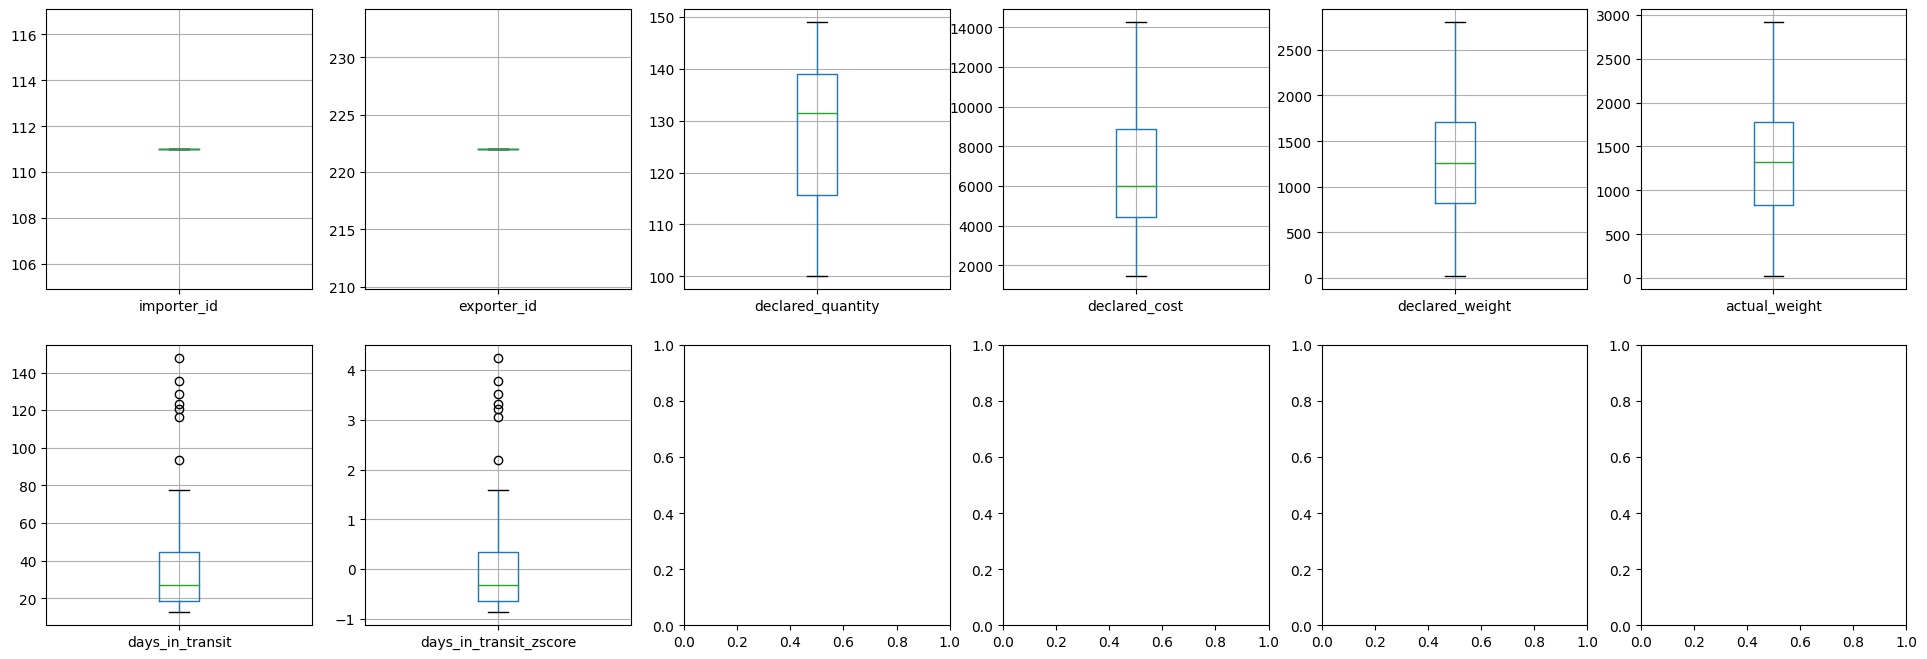

In [23]:
#identificando possíveis outliers
import math
def show_bloxplot(df, colunas=[], maxcols=6):
    if type(colunas) is str:
        df.boxplot(column=[colunas])
    else:
        if len(colunas) == 0:
            colunas = df.select_dtypes(include=np.number).columns
        if maxcols > len(colunas): maxcols = len(colunas)
        maxlins = math.ceil(len(colunas) / maxcols)
        fig, ax = plt.subplots(nrows=maxlins, ncols=maxcols, figsize = (4*maxcols,4*maxlins))
        lin = col = 0
        for atrib in colunas:
            if maxlins == 1:
                df.boxplot( column=[atrib], ax=ax[col]  )
            else:
                df.boxplot( column=[atrib], ax=ax[lin,col]  )
            col += 1
            if col == maxcols:
                col = 0
                lin += 1
        plt.show()

show_bloxplot(data)

NameError: ignored

Liste as linhas onde foram encontrados outliers usando o z-score para a coluna **days_in_transit**

In [14]:
from scipy.stats import zscore

data['days_in_transit_zscore'] = zscore(data['days_in_transit'])

limite_zscore = 3

outliers_rows = data[abs(data['days_in_transit_zscore']) > limite_zscore]

print("Linhas com outliers:")
print(outliers_rows)

data = data.drop('days_in_transit_zscore', axis=1)

Linhas com outliers:
     valid_import   item  importer_id  exporter_id country_of_origin  \
61          False  cigar          111          222             India   
73          False  cigar          111          222            France   
81          False  cigar          111          222             India   
85          False  cigar          111          222             China   
97          False  cigar          111          222             Italy   
105         False  cigar          111          222             China   

     declared_quantity  declared_cost mode_of_transport    route  \
61                 131    1594.074225               sea  america   
73                 110    8953.524711               sea  america   
81                 134    3326.973672               sea  america   
85                 113    5745.640896               sea  america   
97                 144   10849.145863               sea  america   
105                139    4174.018265               sea  america  

Liste as linhas onde foram encontrados outliers usando o intervalo do interquartil (IQR) para a coluna **days_in_transit**

In [15]:
Q1 = data['days_in_transit'].quantile(0.25)
Q3 = data['days_in_transit'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers_rows_iqr = data[(data['days_in_transit'] < limite_inferior) | (data['days_in_transit'] > limite_superior)]

print(outliers_rows_iqr)

     valid_import   item  importer_id  exporter_id country_of_origin  \
61          False  cigar          111          222             India   
69          False  cigar          111          222               USA   
73          False  cigar          111          222            France   
81          False  cigar          111          222             India   
85          False  cigar          111          222             China   
97          False  cigar          111          222             Italy   
105         False  cigar          111          222             China   

     declared_quantity  declared_cost mode_of_transport    route  \
61                 131    1594.074225               sea  america   
69                 140   10118.224045               sea  america   
73                 110    8953.524711               sea  america   
81                 134    3326.973672               sea  america   
85                 113    5745.640896               sea  america   
97             

Remova as linhas com outliers (escolha o método)

In [16]:
from scipy.stats import zscore

data['days_in_transit_zscore'] = zscore(data['days_in_transit'])

limite_zscore = 3

outliers_rows = data[abs(data['days_in_transit_zscore']) > limite_zscore]

data_sem_outliers_zscore = data.drop(outliers_rows.index)

data_sem_outliers_zscore = data_sem_outliers_zscore.drop('days_in_transit_zscore', axis=1)

Confira os ouliers removidos com o boxplot

TypeError: ignored

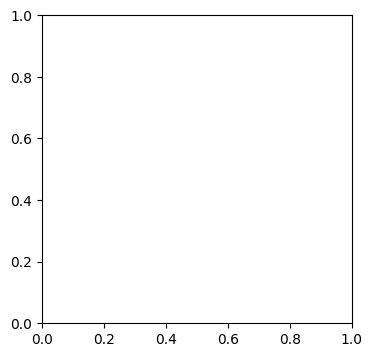

In [22]:
show_bloxplot(data_sem_outliers_zscore, colunas=['days_in_transit'])

show_bloxplot(data_sem_outliers_iqr, colunas=['days_in_transit'])

Faça o gráfico de correlação dos atributos

<ipython-input-24-817e9be1086e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


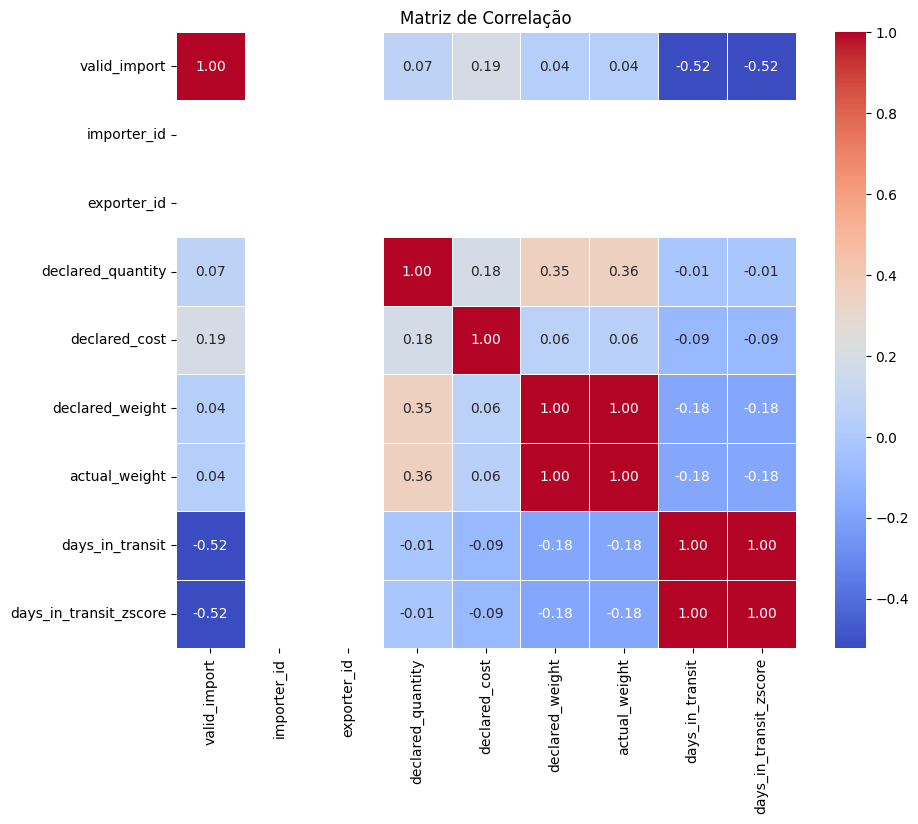

In [24]:
import seaborn as sns

correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

### **03) Realizar a regressão no dataset preparado**:




Selecionando as colunas para a regressão

*   Usar os dados das colunas '**declared_quantity**', '**declared_cost**', '**declared_weight**' e '**days_in_transit**' como variáveis independentes (X)
*   Usar os dados da coluna '**actual_weight**' como variável dependente ou alvo da predição da regressão (y)



In [25]:
# Realizando a análise de regressão
X = data[['declared_quantity', 'declared_cost', 'declared_weight', 'days_in_transit']].values  #variáveis independentes
y = data['actual_weight'].values #variável dependente

In [26]:
X[:5]

array([[ 129.        , 3784.40255099, 1608.60513487,   18.23285734],
       [ 104.        , 3081.35080621,  831.71930072,   32.43602852],
       [ 130.        , 4414.12574067, 1527.7041649 ,   16.9962063 ],
       [ 143.        , 2533.53599053, 1138.68056344,   19.96588625],
       [ 141.        , 4396.39788712,  761.74458131,   22.1600341 ]])

In [27]:
y[:5]

array([1637.66122074,  848.27341893, 1582.06391085, 1179.99381685,
        781.73508025])

Realizar a normalização dos dados

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_normalized = scaler.fit_transform(X)

print(X_normalized[:5])

[[ 0.10573716 -0.99326762  0.54543814 -0.64971388]
 [-1.60891952 -1.22924605 -0.68672369 -0.11294799]
 [ 0.17432343 -0.78190183  0.41712703 -0.69644936]
 [ 1.0659449  -1.41311939 -0.19987487 -0.58421929]
 [ 0.92877237 -0.78785216 -0.79770548 -0.50129811]]


Separar os dados normalizados em conjuntos de treino e teste

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

print("Dimensões do conjunto de treino X:", X_train.shape)
print("Dimensões do conjunto de teste X:", X_test.shape)
print("Dimensões do conjunto de treino y:", y_train.shape)
print("Dimensões do conjunto de teste y:", y_test.shape)

Dimensões do conjunto de treino X: (96, 4)
Dimensões do conjunto de teste X: (24, 4)
Dimensões do conjunto de treino y: (96,)
Dimensões do conjunto de teste y: (24,)


In [ ]:
X_train.shape, X_test.shape

Realize a previsão usando a regressão linear, apresentando o R2 e o MSE

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

modelo_regressao = LinearRegression()

modelo_regressao.fit(X_train, y_train)

y_pred = modelo_regressao.predict(X_test)

r2 = r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

print("Coeficiente de Determinação (R²):", r2)
print("Erro Quadrático Médio (MSE):", mse)

ValueError: ignored

Regressão usando floresta de árvores de decisão, apresentando o R2 e o MSE

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

modelo_rf = RandomForestRegressor(random_state=42)

modelo_rf.fit(X_train, y_train)

y_pred_rf = modelo_rf.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)

mse_rf = mean_squared_error(y_test, y_pred_rf)

print("Coeficiente de Determinação (R²) - Random Forest:", r2_rf)
print("Erro Quadrático Médio (MSE) - Random Forest:", mse_rf)

ValueError: ignored